<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [1]:
import numpy as np

mat = np.array([[4, 2], [2, 4]])

value, vector = np.linalg.eig(mat)

## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [4]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
features = df.loc[:,'bill_length_mm':'body_mass_g']
species = df['species']

In [6]:
features = features.dropna()
features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
extracted_df.head()

,PC1,PC2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210


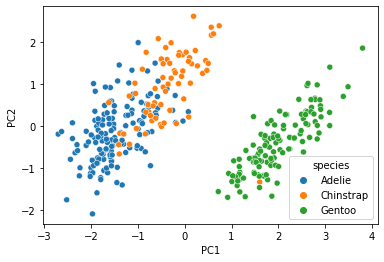

In [9]:
sns.scatterplot(data=extracted_df, x='PC1', y='PC2', hue=species)

In [10]:
ratio = pca.explained_variance_ratio_
ratio

array([0.68843878, 0.19312919])